In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D, UpSampling2D, concatenate
from keras.layers.core import Dropout
from keras.optimizers import Adadelta, SGD
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from ImageDataGenerator import ImageDataGenerator
from data import load_train_data, load_test_data
from train import *

C:\Users\chiawei\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = get_unet()
model_checkpoint = ModelCheckpoint(model_filename, monitor='loss', save_best_only=True)
if(os.path.exists(model_filename)):
    model.load_weights(model_filename)

In [3]:
imgs_train, imgs_mask_train = load_train_data()
imgs_train = imgs_train.astype('float32')
mean = np.mean(imgs_train) 
std = np.std(imgs_train) 

In [4]:
imgs_test, imgs_mask_test = load_test_data()
imgs_test_processed = preprocess(imgs_test)
imgs_test_processed = imgs_test_processed.astype('float32')
imgs_test_processed -= mean
imgs_test_processed /= std
imgs_test_processed = swap_axes(imgs_test_processed)

In [5]:
def predict_image(index):
    pred = model.predict(imgs_test_processed[index:index+1])
    pred_mask = np.where(pred > 0.5, 1, 0)[0,:,:,0]
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(18, 6), nrows=1, ncols=4)
    
    img1 = imgs_test[index, 0, :, :]
    title1 = 'Test Image [{}]'.format(index) + '\n' + \
             'Dimension : {}'.format(img1.shape)
    ax1.imshow(img1, cmap='gray')
    ax1.set_title(title1)
    
    img2 = imgs_mask_test[index, 0, :, :]
    title2 = 'Test Image Mask [{}]'.format(index) + '\n' + \
             'Dimension : {}'.format(img2.shape)
    ax2.imshow(img2, cmap='gray')
    ax2.set_title(title2)
    
    img3 = pred_mask
    title3 = 'Test Image Mask Prediction [{}]'.format(index) + '\n' + \
             'Dimension : {}'.format(img3.shape)
    ax3.imshow(img3, cmap='gray')
    ax3.set_title(title3)
    
    img4 = cv2.resize(pred_mask.astype(np.float32), (img2.shape[1], img2.shape[0]), interpolation=cv2.INTER_AREA)
    title4 = 'Test Image Mask Prediction [{}] (Resized)'.format(index) + '\n' + \
             'Dimension : {}'.format(img4.shape)
    ax4.imshow(img4, cmap='gray')
    ax4.set_title(title4)
    
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

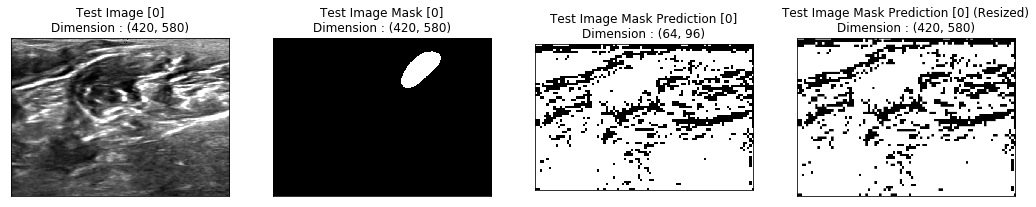

In [6]:
predict_image(0)

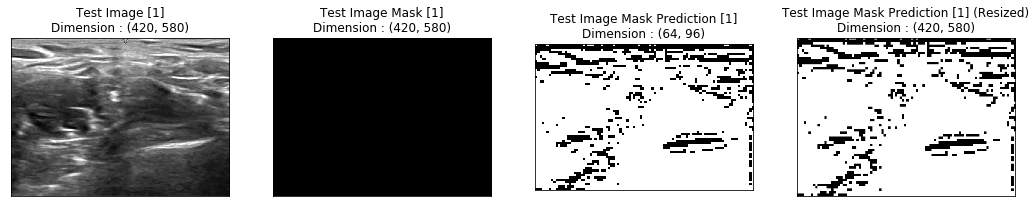

In [7]:
predict_image(1)

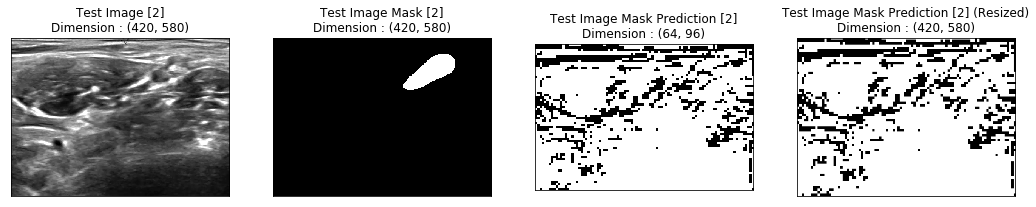

In [8]:
predict_image(2)